## **Classification using K-Nearest Neighbors**

Load the IRIS data

In [5]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

iris = pd.read_csv('./iris.csv')

# iris = pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns=iris['feature_names']+['target'])
iris.rename(columns={'species':'target'}, inplace=True)
iris.head()


,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Create class label/vector.

In [6]:
labels = iris['target'].unique()

In [7]:
df = iris.drop(['target'], axis=1)

Splitting data into Train, cross-validation and test sets with Stratified Sampling using *train_test_split()*

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
from sklearn.model_selection import train_test_split

X = iris.iloc[: , :-1]
y = iris.iloc[: , -1:]

X_train, X_test_valid, y_train, y_test_valid = train_test_split(X, y, test_size=0.4, random_state=135)
X_test, X_valid, y_test, y_valid = train_test_split(X_test_valid, y_test_valid, test_size=0.5, random_state=135)

Data Preprocessing using column standardisation. Use sklearn.preprocessing.StandardScaler(). 

In [10]:
from sklearn.preprocessing import  StandardScaler

In [11]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_valid = sc.transform(X_valid)

Write your own implementation of K-NN

In [12]:
def getEuclideanDistance(a, b):
  return np.sqrt(np.sum((a - b) ** 2))

In [13]:
def getAccuracyAndError(A, B):
  correct_predictions = 0

  for i in range(len(A)):
    if A[i] == B[i]:
      correct_predictions += 1
  
  accuracy = correct_predictions / len(A)
  error = (len(A) - correct_predictions) / len(A)
  
  return accuracy, error

In [14]:
def knn(X_train, y_train, X_input, y_input, k):
  y_pred = []
  
  for x_input in X_input:
    distances = []

    for i in range(len(X_train)):
      distances.append([ getEuclideanDistance(np.array(x_input) , np.array(X_train[i])), y_train["target"].to_numpy()[i] ])
    
    distances.sort(key = lambda x: x[0])
    k_nearest_points = distances[:k]

    classes = [ ['setosa', 0], ['versicolor', 0], ['virginica', 0] ]

    for point in k_nearest_points:
      if point[1] == 'setosa':
        classes[0][1] += 1
      elif point[1] == 'versicolor':
        classes[1][1] += 1
      else:
        classes[2][1] += 1
    
    classes.sort(key = lambda x: x[1], reverse=True)

    y_pred.append(classes[0][0])
  
  accuracy, error = getAccuracyAndError(y_pred, y_input["target"].to_numpy())

  return accuracy, error

Perform hyper-parameter tuning. Here, K is a hyperparameter. <br>

Compute training accuracy and cross-validation accuracy for every value of K in [1,3,5,7,9,11,13,15,17,19,21,23,25] and choose the best K.


In [15]:
def getResults(X_train, y_train, X_valid, y_valid):
  K = [1,3,5,7,9,11,13,15,17,19,21,23,25]
  accuraciesAndErrors = []
  errors = []

  for k in K:
    train_accuracy, train_error = knn(X_train, y_train, X_train, y_train, k)
    crossval_accuracy, crossval_error = knn(X_train, y_train, X_valid, y_valid, k)

    accuraciesAndErrors.append([ k, round(train_accuracy * 100, 2), round(crossval_accuracy * 100, 2), round(train_error * 100, 2), round(crossval_error * 100, 2) ])

  results = pd.DataFrame(accuraciesAndErrors, columns = ['K', 'Training Accuracy', 'Cross-Validation Accuracy', 'Training Error', 'Cross-Validation Error'])

  return results

In [16]:
results = getResults(X_train, y_train, X_valid, y_valid)
results

,K,Training Accuracy,Cross-Validation Accuracy,Training Error,Cross-Validation Error
0,1,100.00,96.67,0.00,3.33
1,3,96.67,100.00,3.33,0.00
2,5,93.33,100.00,6.67,0.00
3,7,94.44,100.00,5.56,0.00
4,9,94.44,100.00,5.56,0.00
5,11,93.33,93.33,6.67,6.67
6,13,93.33,93.33,6.67,6.67
7,15,94.44,93.33,5.56,6.67
8,17,93.33,93.33,6.67,6.67
9,19,93.33,90.00,6.67,10.00


Plot the "Hyperparameter vs. accuracy" graph for training and CV sets.

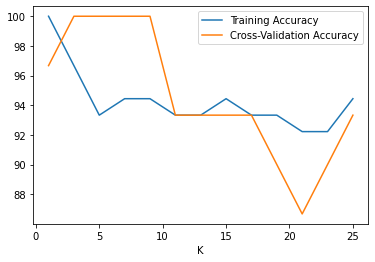

In [17]:
import matplotlib.pyplot as plt
results.plot(x='K', y=['Training Accuracy', 'Cross-Validation Accuracy'], kind="line")
plt.show()

Plot the training and CV errors graphs w.r.t. different values of K. Write your observations for overfitting and underfitting.

In [18]:
display(results[['K', 'Training Error', 'Cross-Validation Error']])

,K,Training Error,Cross-Validation Error
0,1,0.00,3.33
1,3,3.33,0.00
2,5,6.67,0.00
3,7,5.56,0.00
4,9,5.56,0.00
5,11,6.67,6.67
6,13,6.67,6.67
7,15,5.56,6.67
8,17,6.67,6.67
9,19,6.67,10.00


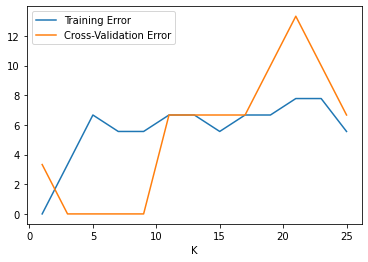

In [19]:
results.plot(x='K', y=['Training Error', 'Cross-Validation Error'], kind="line")
plt.show()

Test the performance of your model on Test sets.

In [20]:
accuracy, error = knn(X_train, y_train, X_test, y_test, 3)
print(f"We are selecting k=3 as optimal number of neighbors.")
print(f"  Accuracy = {round(accuracy * 100, 2)} %")
print(f"  Error = {round(error * 100, 2)} %")

We are selecting k=3 as optimal number of neighbors.
  Accuracy = 93.33 %
  Error = 6.67 %


Compare your implementation with sk-learn's implementation of KNN